<a href="https://colab.research.google.com/github/chaitanyaaditya/CapStone/blob/CapStone2/CapStoneProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [ ]:
## Data Manipulation & Handling & Vizualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## NMF
from sklearn.decomposition import NMF

#Warning Filter library
import warnings
warnings.filterwarnings("ignore")

#Clustering Library
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

## Loading the dataset

In [ ]:
df = pd.read_csv('spotify.xls', index_col=0)

In [ ]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [ ]:
df.shape

(1000, 5000)

## Problem statement

Build recommendation engine using user listening history

In [ ]:
x = df.values
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

## NMF

In [ ]:
nmf = NMF(n_components = 100, max_iter = 1000, random_state=3)

In [ ]:
nmf.fit(x)

NMF(max_iter=1000, n_components=100, random_state=3)

In [ ]:
user_matrix = nmf.transform(x)
song_matrix = nmf.components_.T

In [ ]:
user_matrix

array([[1.59597279, 1.63144383, 0.        , ..., 0.        , 0.        ,
        0.08842005],
       [0.        , 1.37058116, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25150672, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.86093206, ..., 0.        , 2.91063979,
        0.        ],
       [0.89111106, 0.55775866, 5.28815626, ..., 1.14447002, 0.        ,
        0.        ],
       [0.11437224, 0.3810454 , 1.17187612, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
song_matrix

array([[0.09154476, 0.02084876, 0.06170426, ..., 0.20525732, 0.02089963,
        0.42266527],
       [0.29410861, 0.        , 0.01635891, ..., 0.00535885, 0.25048781,
        0.28966942],
       [0.00182988, 0.16233797, 0.00882299, ..., 0.        , 0.0265591 ,
        0.15587654],
       ...,
       [0.37753494, 0.4043987 , 0.38341127, ..., 0.        , 0.49498818,
        0.        ],
       [0.        , 0.15106911, 0.        , ..., 0.34925875, 0.46747326,
        0.36724356],
       [0.09094906, 0.15572379, 0.        , ..., 0.30544496, 0.21424152,
        0.38353537]])

In [ ]:
user_matrix.shape

(1000, 100)

In [ ]:
song_matrix.shape

(5000, 100)

## Steps to build recommendation system - Type 1(for local library or small dataset)
1. Consider recommending songs for the first user (row location 0 in user matrix)
2. Find the euclidian distance between this first user and the remaining 999 users.
3. Find out top 10 songs heard by nearest 5 users
4. Recommend this 10 songs to the first users.

Calculating the distance between 2 users.

In [ ]:
def col_dist(u1,u2):
    return pow(sum(pow(u1[x]-u2[x],2)for x in range(len(u1))),0.5)

In [ ]:
col_dist(user_matrix[0], user_matrix[1])

17.066386601826405

In [ ]:
from platform import python_version

print(python_version())

3.9.15


In [ ]:
#buser is for base user from which we are finding distance between 999 users)

def distance_from_rem_users(buser, user_matrix):
    dist=[]
    for i in range(len(user_matrix)):
        if buser!=i:
            dist.append(col_dist(user_matrix[buser], user_matrix[i]))
    return dist

In [ ]:
dist_user1 = distance_from_rem_users(0, user_matrix)

In [ ]:
dist_user1

[17.066386601826405,
 15.356075620840773,
 15.860626597198227,
 15.085478037649489,
 13.844410783740862,
 14.938304994809554,
 13.250608547710643,
 16.84837011318289,
 15.14656275921705,
 15.085160715955208,
 15.426113947412805,
 15.162198319848336,
 8.915369316354946,
 16.06701968592764,
 14.192876182598646,
 12.16310373027404,
 15.34202355923998,
 15.107063797989863,
 12.398262626542504,
 13.014577302532768,
 15.558351008865385,
 15.60633353073488,
 16.15773243607876,
 16.372436321651236,
 15.742562231413245,
 15.287379336353345,
 14.67893233200893,
 13.958180490073039,
 16.353768628808194,
 16.16795046379697,
 15.59280586939767,
 15.300255567404227,
 14.813458276118547,
 14.67227907559743,
 14.966327526945037,
 14.957592291537836,
 15.289917564526545,
 15.751052100912702,
 15.536270215621187,
 13.989176492492854,
 15.584294899734129,
 14.422344103032863,
 14.02991455503989,
 14.4986132438705,
 15.124960994335828,
 14.030779564396534,
 12.413550520410288,
 14.918957038420903,
 13.491

## Finding nearest 5 users

In [ ]:
nearest_users = np.argsort(dist_user1)[:5]

In [ ]:
nearest_users

array([ 12, 613, 665, 913, 394], dtype=int64)

In [ ]:
for i in range(len(nearest_users)):
    nearest_users[i]+=1
print(nearest_users)

[ 13 614 666 914 395]


## Finding the most heard songs by this users

In [ ]:
for i in nearest_users:
    print("Songs heard by user", i, "are: ")
    temp = df.iloc[i]
    print(temp[temp.values!=0].index)

Songs heard by user 13 are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_13',
       ...
       'song_4989', 'song_4990', 'song_4991', 'song_4992', 'song_4993',
       'song_4994', 'song_4995', 'song_4997', 'song_4998', 'song_5000'],
      dtype='object', length=4687)
Songs heard by user 614 are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4686)
Songs heard by user 666 are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', lengt

## Picking out top 10 songs from above list of songs

In [ ]:
def topNsongs(nearest_users, df, N):
    temp = df.iloc[nearest_users]
    dict1 = temp.max().to_dict()
    #print(dict1)
    
#Converting every key-value pair into a tuple and swapping them for sorting purpose,
#end result is a list of song and number of times heard tuple.

    sorted_dict = sorted(dict1.items() , key = lambda keyvalue:(keyvalue[1], keyvalue[0]), reverse = True)[:N]
    print(sorted_dict)
    return[x[0] for x in sorted_dict]
    #return 0

In [ ]:
topNsongs(nearest_users, df,10)

[('song_998', 15), ('song_990', 15), ('song_99', 15), ('song_988', 15), ('song_987', 15), ('song_986', 15), ('song_985', 15), ('song_982', 15), ('song_979', 15), ('song_968', 15)]


['song_998',
 'song_990',
 'song_99',
 'song_988',
 'song_987',
 'song_986',
 'song_985',
 'song_982',
 'song_979',
 'song_968']

## Type 2 Recommendation system for larger datasets

## K-means Clustering

In [ ]:
WCSS = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(song_matrix)
    WCSS[k] = kmeans.inertia_

In [ ]:
WCSS

{1: 14072.226800880684,
 2: 13901.229818988912,
 3: 13774.44449356146,
 4: 13672.682937702994,
 5: 13591.479471271621,
 6: 13520.787367123394,
 7: 13455.43662075005,
 8: 13404.451184901836,
 9: 13358.596841121209,
 10: 13306.3898787508,
 11: 13274.381879971115,
 12: 13229.54489150836,
 13: 13203.907192658542,
 14: 13181.544693082074,
 15: 13151.127733219848,
 16: 13114.07516414105,
 17: 13103.652906573569,
 18: 13079.914901049058,
 19: 13062.477768799263,
 20: 13037.213120547336,
 21: 13023.579314253575,
 22: 13005.421145074924,
 23: 12993.001112428004,
 24: 12975.672290601236,
 25: 12960.858525057625,
 26: 12950.5216698539,
 27: 12921.25423059306,
 28: 12903.762090510252,
 29: 12895.089451345846,
 30: 12877.56483899214,
 31: 12869.193201092474,
 32: 12849.42560805394,
 33: 12843.255087369904,
 34: 12823.474645956292,
 35: 12810.590205896777,
 36: 12802.403027539533,
 37: 12787.930782030304,
 38: 12776.368367914654,
 39: 12774.38475987283,
 40: 12759.561941581109,
 41: 12733.6436996945

Text(0, 0.5, 'WCSS')

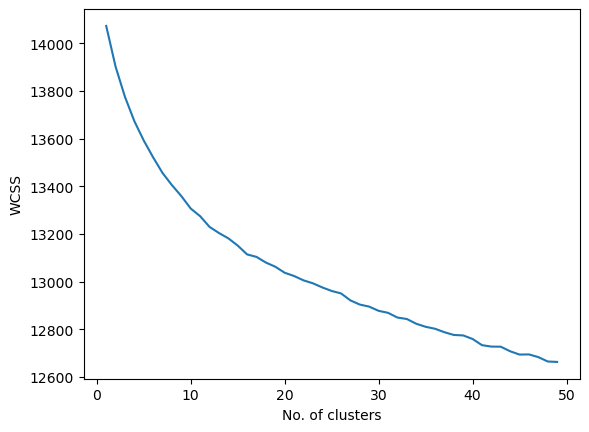

In [ ]:
plt.plot(WCSS.keys(), WCSS.values())
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")